In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('display.max_columns', None)
df_original = pd.read_excel("1 - Project Data.xlsx")
df_original.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [3]:
X = df_original.drop(columns = ['Churn Label', 'Churn Value', 'Churn Reason'])
y = df_original['Churn Value']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
def clean(df_original):
    # Mapping
    df_original['Gender'] = df_original.Gender.map({'Female':0, 'Male':1})
    df_original['Senior Citizen'] = df_original['Senior Citizen'].map({'No':0, 'Yes':1})
    df_original['Partner'] = df_original.Partner.map({'No':0, 'Yes':1})
    df_original['Dependents'] = df_original.Dependents.map({'No':0, 'Yes':1})
    df_original['Total Charges'] = pd.to_numeric(df_original['Total Charges'], errors='coerce')
    df_original['Total Charges'].fillna(0, inplace = True)
    df_original['Paperless Billing'] = df_original['Paperless Billing'].map({'No':0, 'Yes':1})   
    
    # Fill Nas
    df_original['Total Charges'].fillna(0, inplace=True)

    # OHE
    ohe_columns = ['Payment Method', 'Contract', 'Internet Service', 'Multiple Lines', 'Online Security',
     'Online Backup',
     'Device Protection',
     'Tech Support',
     'Streaming TV',
     'Streaming Movies']
    df_original = pd.get_dummies(df_original, columns = ohe_columns, drop_first = True, dtype = int)

    return df_original

In [6]:
X_train_fe = clean(X_train)
X_test_fe = clean(X_test)

C:\Users\rahul\AppData\Local\Temp\ipykernel_2116\95374104.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original['Total Charges'].fillna(0, inplace = True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_2116\95374104.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [7]:
def sanity_check(X, y):
    assert(len(X) == len(y)) , "Lengths dont match"
    assert(all(X.index == y.index)), "Indexs dont match"


In [8]:
sanity_check(X_train, y_train)

In [9]:
Feature_Columns = [#'CustomerID',
# 'Count',
 #'Country',
 #'State',
 #'City',
 #'Zip Code',
# 'Lat Long',
 #'Latitude',
#'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 #'Tenure Months',
 #'Phone Service',
# 'Multiple Lines',
# 'Internet Service',
# 'Online Security',
 #'Online Backup',
 #'Device Protection',
 #'Tech Support',
 #'Streaming TV',
 #'Streaming Movies',
 'Paperless Billing',
# 'Monthly Charges',
 #'Total Charges',
 #'Churn Label',
 #'Churn Value',
 #'Churn Reason',
'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Payment Method_Mailed check',
 'Contract_One year',
 'Contract_Two year',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Lat_Scaled',
 'Lon_Scaled',
 'Monthly_Charges_Scaled',
 'Total_Charges_Scaled',
 'Tenure_Months_Scaled']

In [10]:
Feature_Columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Paperless Billing',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Payment Method_Mailed check',
 'Contract_One year',
 'Contract_Two year',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Lat_Scaled',
 'Lon_Scaled',
 'Monthly_Charges_Scaled',
 'Total_Charges_Scaled',
 'Tenure_Months_Scaled']

In [11]:
scaler = MinMaxScaler()
scale_cols = ['Latitude', 'Longitude', 'Monthly Charges', 'Total Charges', 'Tenure Months']
scaler.fit(X_train_fe[scale_cols])
X_train_fe[['Lat_Scaled', 'Lon_Scaled', 'Monthly_Charges_Scaled', 'Total_Charges_Scaled', 'Tenure_Months_Scaled']] = scaler.transform(X_train_fe[scale_cols])
X_test_fe[['Lat_Scaled', 'Lon_Scaled', 'Monthly_Charges_Scaled', 'Total_Charges_Scaled','Tenure_Months_Scaled']] = scaler.transform(X_test_fe[scale_cols])

In [12]:
X_train_fe.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Lat_Scaled,Lon_Scaled,Monthly_Charges_Scaled,Total_Charges_Scaled,Tenure_Months_Scaled
341,7831-QGOXH,1,United States,California,Blue Lake,95525,"40.94338, -123.831799",40.943380,-123.831799,0,0,0,0,18,Yes,1,85.20,1553.90,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.891695,0.046453,0.665670,0.179177,0.250000
3706,6476-EPYZR,1,United States,California,Wishon,93669,"37.287758, -119.548156",37.287758,-119.548156,1,0,1,1,12,Yes,0,20.50,255.50,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0.503060,0.470221,0.020927,0.029461,0.166667
5619,8966-OIQHG,1,United States,California,Stanton,90680,"33.801869, -117.995068",33.801869,-117.995068,0,0,1,1,22,Yes,0,20.75,452.35,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0.132469,0.623863,0.023418,0.052159,0.305556
6353,9605-WGJVW,1,United States,California,Stockton,95204,"37.974498, -121.319568",37.974498,-121.319568,0,1,0,0,1,Yes,1,70.20,70.20,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576068,0.294981,0.516193,0.008095,0.013889
5438,6857-TKDJV,1,United States,California,Strawberry Valley,95981,"39.58458, -121.093256",39.584580,-121.093256,1,0,1,1,67,Yes,0,24.65,1620.45,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0.747239,0.317369,0.062282,0.186850,0.930556


In [13]:
X_train_fe = X_train_fe[Feature_Columns]
X_test_fe = X_test_fe[Feature_Columns]

In [14]:
X_test_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Lat_Scaled,Lon_Scaled,Monthly_Charges_Scaled,Total_Charges_Scaled,Tenure_Months_Scaled
4980,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.557706,0.187870,0.565022,0.116847,0.194444
4472,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0.173927,0.541979,0.011958,0.036258,0.222222
5501,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0.777897,0.405847,0.206776,0.310495,0.972222
6386,1,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0.514398,0.412932,0.952666,0.942744,0.986111
6212,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0.593739,0.243664,0.802192,0.788543,0.972222


<Axes: >

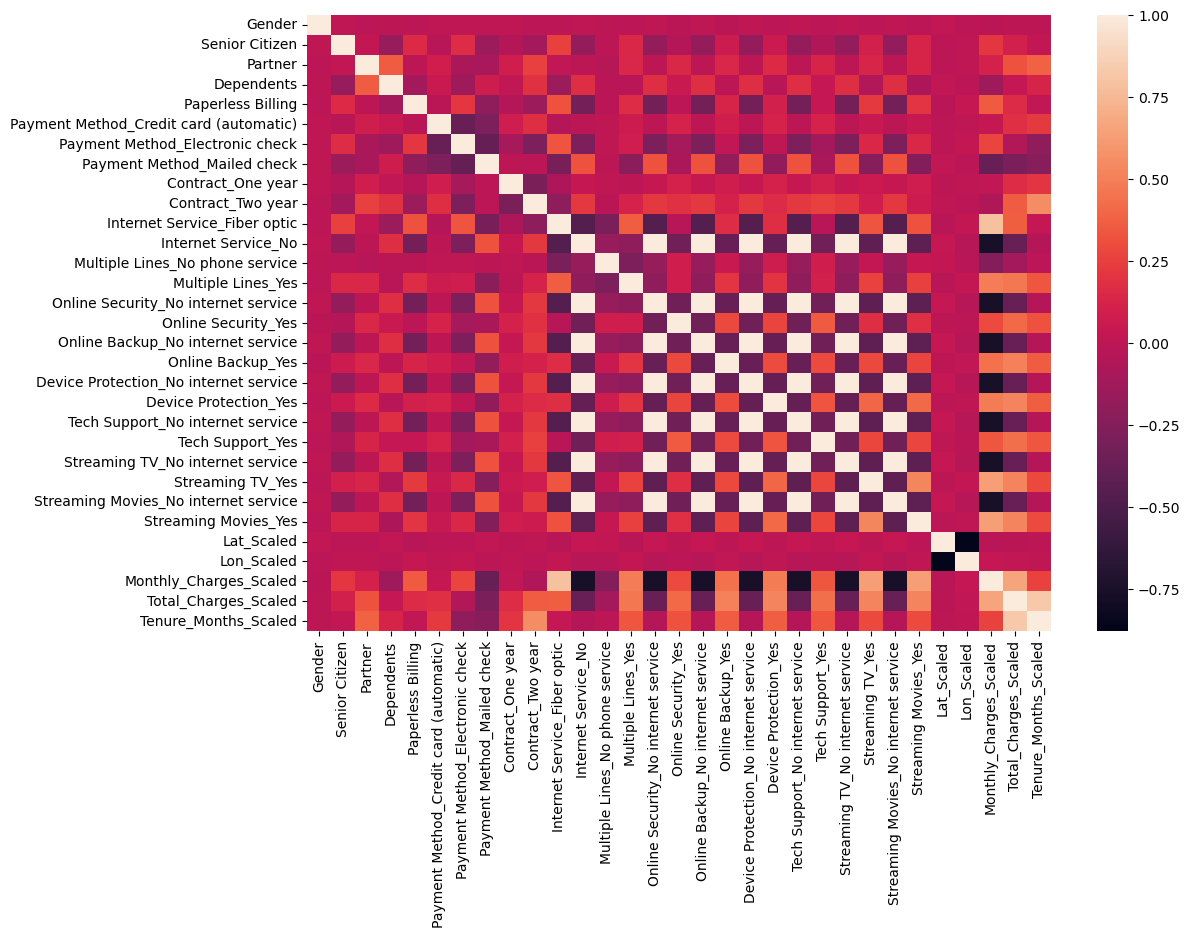

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_fe.corr(numeric_only = True))

In [16]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train_fe, y_train)

In [17]:
model.score(X_train_fe, y_train)

0.8095491657791978

In [18]:
model.score(X_test_fe, y_test)

0.8232789212207239